## Approaching the Problem of Big Mart Sales Prediction

### Load The Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train_v9rqX0R.csv')
test_data = pd.read_csv('test_AbJTz2l.csv')

### Identify and eliminate null values

In [3]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight is numerical data type hence, we can fill it with Median value of that feature.

In [4]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].median())

Outlet Size is a categorical column we can use ffill and bfill to fill null values but, it is not an ideal approach and also it will affect our prediction model's performance. Thus, I followed the following steps :- <br>
- By looking at the features, I observed that Outlet Size is dependent on certain features like Outlet_Identifier, Outlet_Establishment_Year, Outlet_Location_Type, Outlet_Type.
- I used RandomForestClassifier and Iterative Imputer to impute outlet size values based on the above mentioned columns.
- Performed label encoding and one hot encoding to convert categorical to numerical columns.

In [5]:
cols = ['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']
df_selected = train_data[cols]

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [7]:
label_encoders = {}
for col in ['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    label_encoders[col] = le

C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_18520\2479609862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col])
C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_18520\2479609862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col])
C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_18520\2479609862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [8]:
df_missing = df_selected[df_selected['Outlet_Size'].isnull()].copy()
df_complete = df_selected.dropna().copy()

In [9]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
outlet_size_encoded = ohe.fit_transform(df_complete[['Outlet_Size']])

In [10]:
clf = RandomForestClassifier()
X_train = df_complete.drop(columns=['Outlet_Size'])
y_train = outlet_size_encoded
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
X_missing = df_missing.drop(columns=['Outlet_Size'])
predicted = clf.predict(X_missing)
predicted_labels = ohe.inverse_transform(predicted)
train_data.loc[train_data['Outlet_Size'].isnull(), 'Outlet_Size'] = predicted_labels


In [12]:
train_data.isna().sum().sum()

0

Repeated same steps for test data as well.

In [13]:
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].median())

In [14]:
df_selected = test_data[cols]

In [15]:
label_encoders = {}
for col in ['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    label_encoders[col] = le

C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_18520\2479609862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col])
C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_18520\2479609862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col])
C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_18520\2479609862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [16]:
df_missing = df_selected[df_selected['Outlet_Size'].isnull()].copy()
df_complete = df_selected.dropna().copy()

In [17]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
outlet_size_encoded = ohe.fit_transform(df_complete[['Outlet_Size']])

In [18]:
clf = RandomForestClassifier()
X_train = df_complete.drop(columns=['Outlet_Size'])
y_train = outlet_size_encoded
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
X_missing = df_missing.drop(columns=['Outlet_Size'])
predicted = clf.predict(X_missing)
predicted_labels = ohe.inverse_transform(predicted)
test_data.loc[test_data['Outlet_Size'].isnull(), 'Outlet_Size'] = predicted_labels

### Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

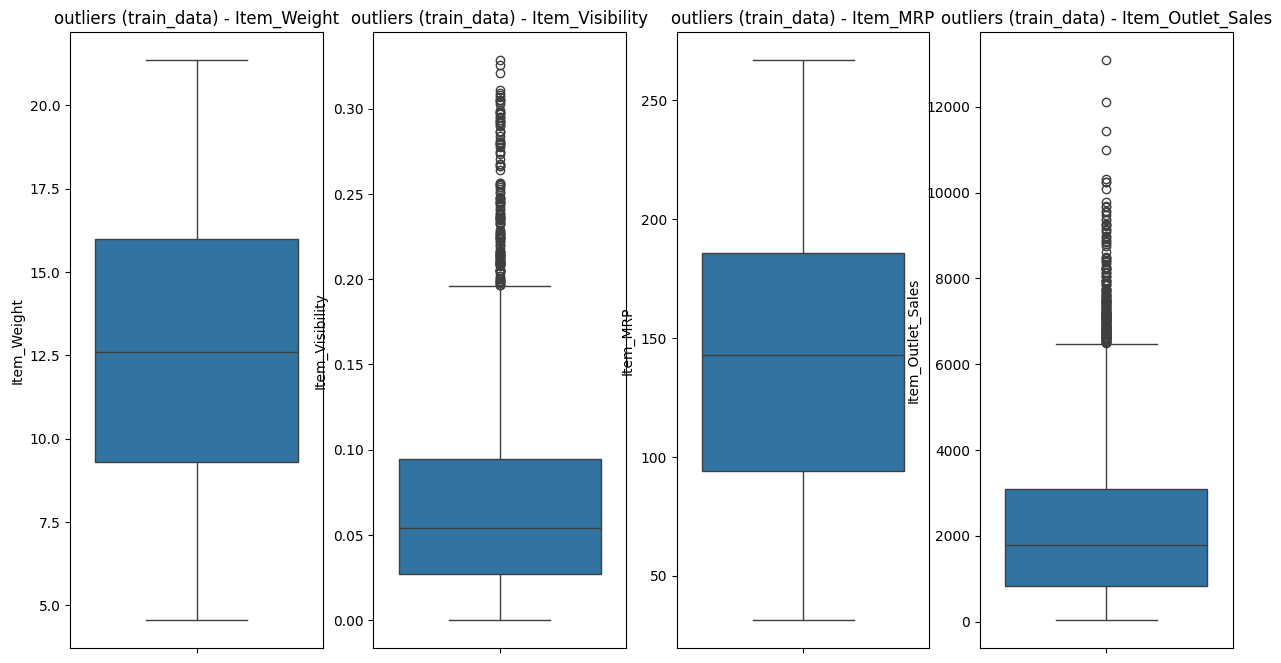

In [21]:
num_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
fig, axes = plt.subplots(1, len(num_columns), figsize=(15, 8))  
for i, col in enumerate(num_columns):
    sns.boxplot(y=train_data[col], ax=axes[i])  
    axes[i].set_title(f"outliers (train_data) - {col}")
plt.show()

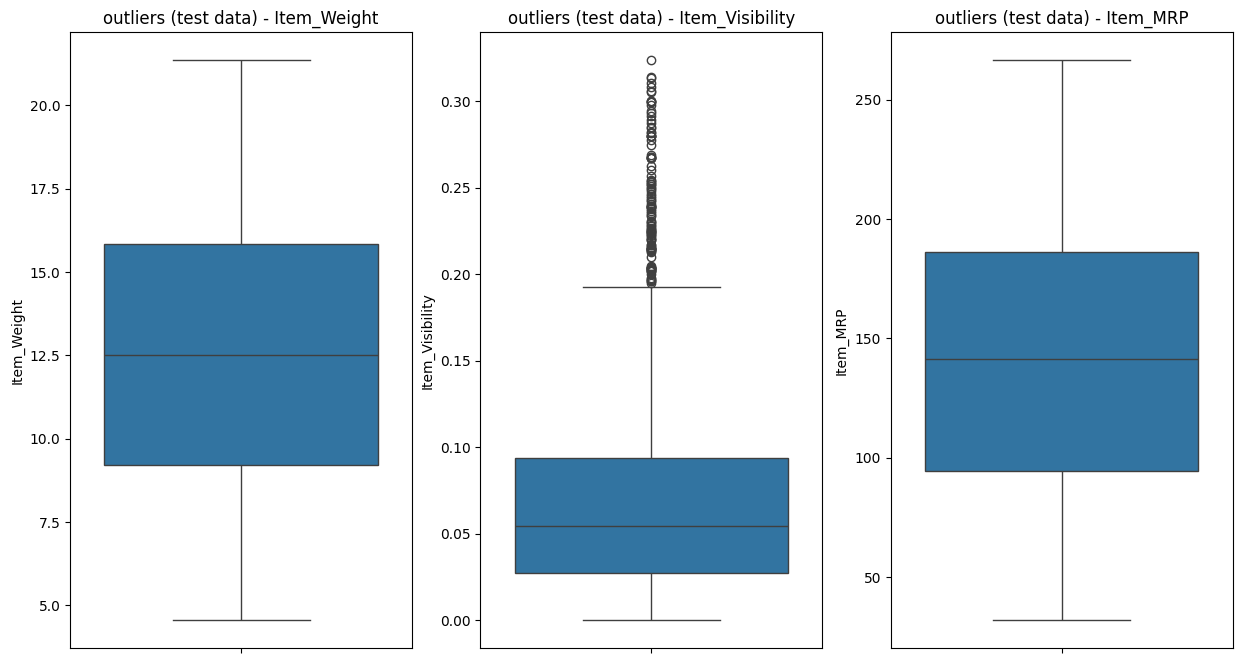

In [22]:
num_colums2 = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
fig, axes = plt.subplots(1, len(num_colums2), figsize=(15, 8))
for i, col in enumerate(num_colums2):
    sns.boxplot(y=test_data[col], ax=axes[i])
    axes[i].set_title(f"outliers (test data) - {col}")

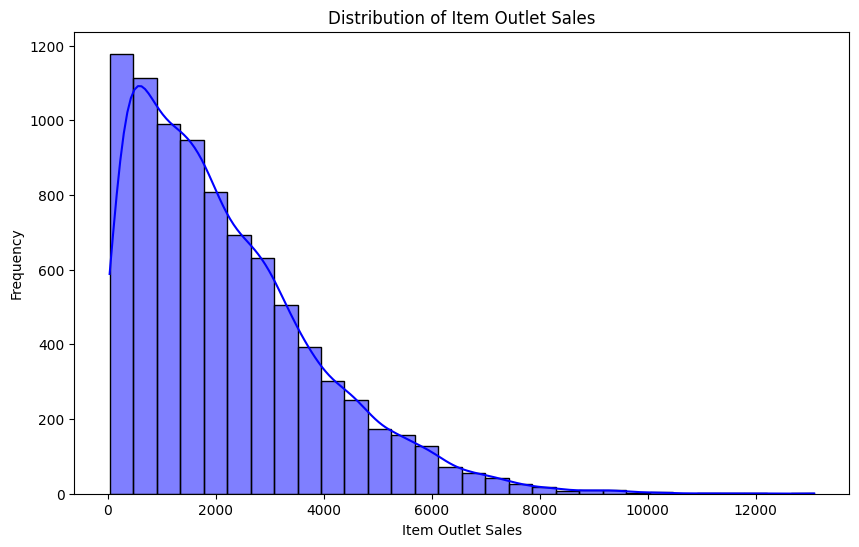

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Item_Outlet_Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

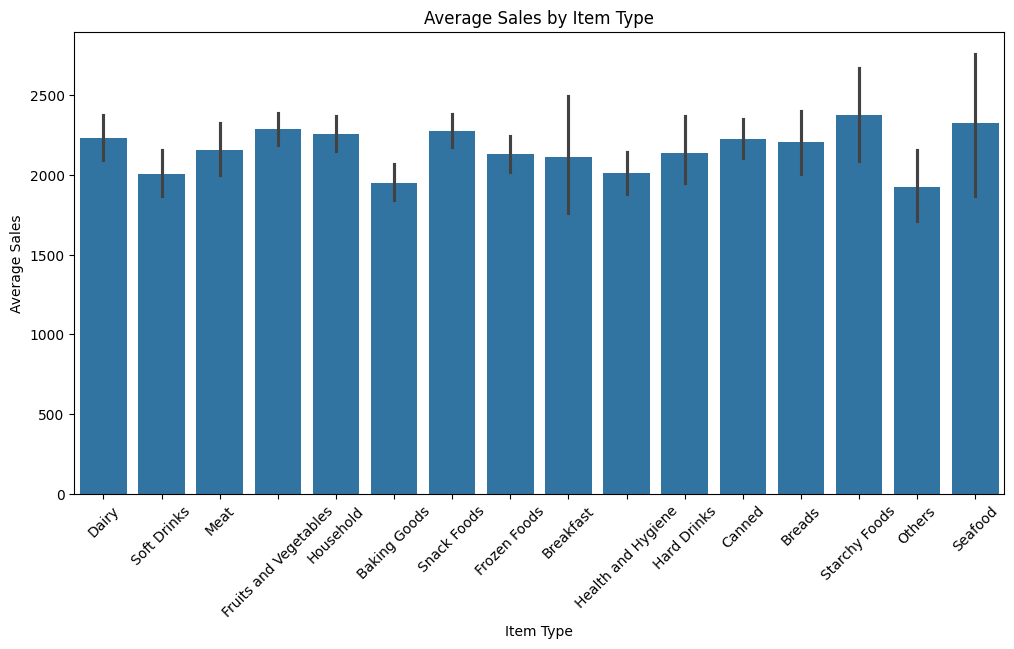

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Average Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

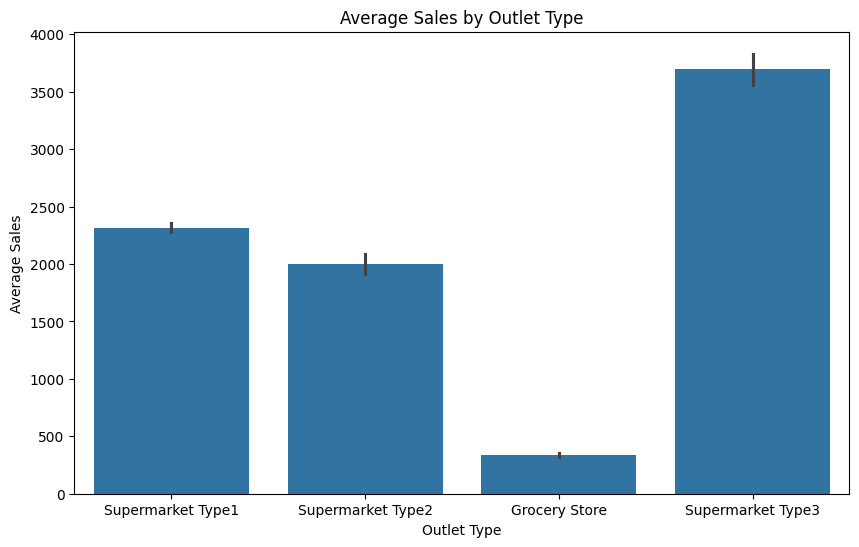

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')
plt.show()

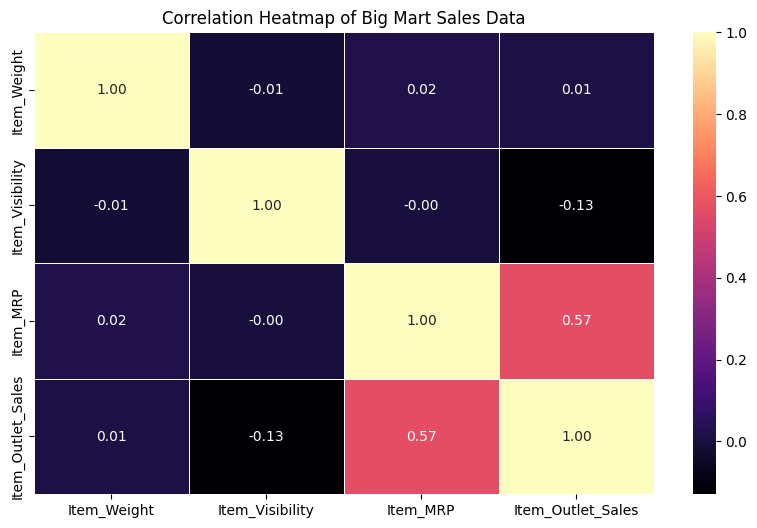

In [27]:
plt.figure(figsize=(10, 6))
correlation_matrix = train_data[num_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Big Mart Sales Data')
plt.show()

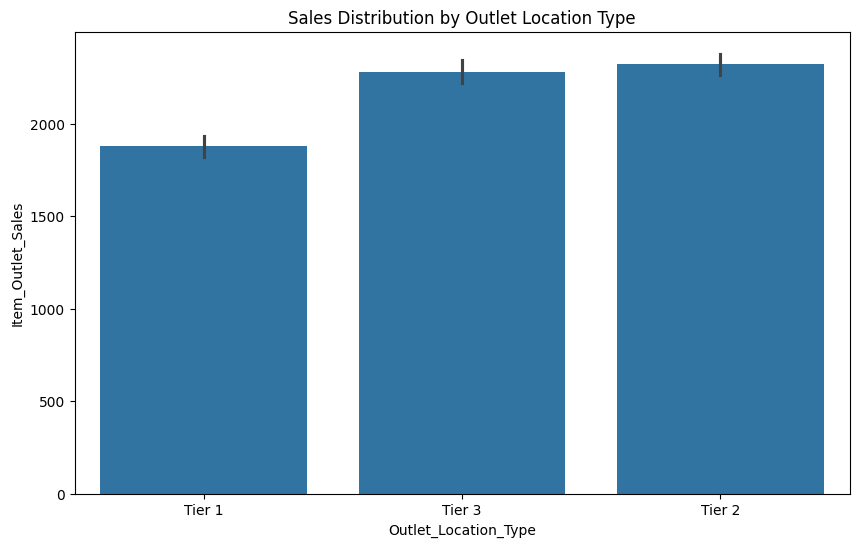

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data, )
plt.title('Sales Distribution by Outlet Location Type')
plt.show()

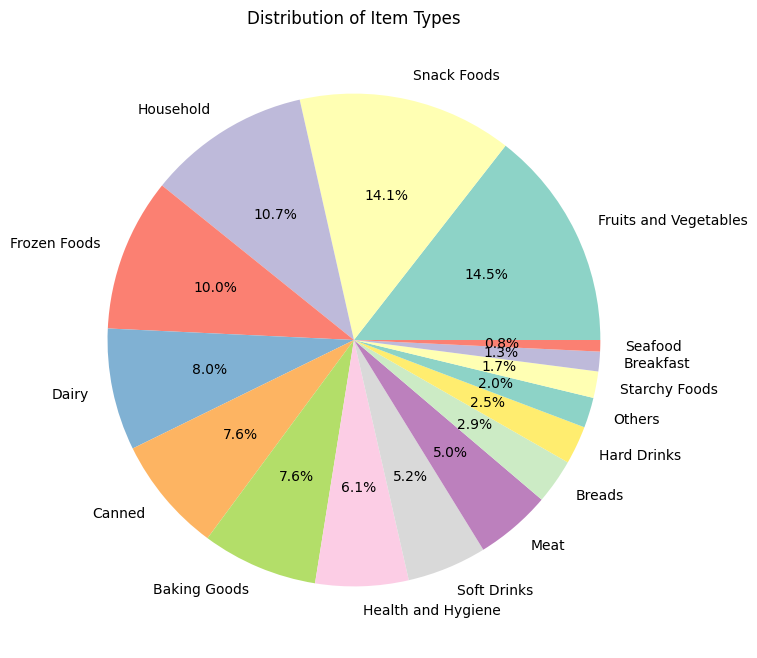

In [29]:
plt.figure(figsize=(8, 8))
item_type_counts = train_data['Item_Type'].value_counts()
plt.pie(item_type_counts, labels=item_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(item_type_counts)))
plt.title('Distribution of Item Types')
plt.show()

We have to change values in Item_Fat_Content columns from [LF, low fat] to Low Fat and reg to Regular as the values means the same.

In [30]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

Item_Visibility : The % of total display area of all products in a store allocated to the particular product. If there exists 0 in that column, it means that the product was never displayed in the store which is not possible. To avoid that we must replace all rows containing 0 with mean of the column.

In [31]:
train_data['Item_Visibility'] = train_data.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x : x.replace(0, x.mean()))
test_data['Item_Visibility'] = test_data.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x : x.replace(0, x.mean()))

### Converting categorical columns to numerical columns for model.

In [32]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map({'Low Fat' : 0, 'Regular': 1})
train_data['Outlet_Size'] = train_data['Outlet_Size'].map({'Small':0, 'Medium': 1, "High": 2})
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].map({'Tier 3': 0 , 'Tier 2': 1, 'Tier 1': 2})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Outlet_Type'] = le.fit_transform(train_data['Outlet_Type'])
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,2,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,0,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,2,1,2097.2700
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,0,0,732.3800
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,2,0,1,994.7052


In [33]:
train_data['Age_of_store'] = 2013 - train_data['Outlet_Establishment_Year']

In [34]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map({'Low Fat' : 0, 'Regular': 1})
test_data['Outlet_Size'] = test_data['Outlet_Size'].map({'Small':0, 'Medium': 1, "High": 2})
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].map({'Tier 3': 0 , 'Tier 2': 1, 'Tier 1': 2})

In [35]:
test_data['Outlet_Type'] = le.fit_transform(test_data['Outlet_Type'])
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,2,1
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,0,1,1
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,2,0,0
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,0,1,1
4,FDY38,12.500,1,0.118599,Dairy,234.2300,OUT027,1985,1,0,3


In [36]:
test_data['Age_of_store'] = 2013 - test_data['Outlet_Establishment_Year']

### Model Building

In [37]:
X  = train_data.drop(columns= ['Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Outlet_Identifier', 'Item_Type', 'Item_Identifier'])
y  = train_data['Item_Outlet_Sales']
X_test = test_data.drop(columns=['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'])

Using StandardScaler() to standardize the data, which helps in faster convergence of my MLP model and reduce the effect of outliers by some amount.

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(X_test)

Used a Multilayer Perceptron Neural Network with 2 Dense layers and one output layer with 'Relu' activation function.

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation = 'relu')) 

model.compile(optimizer='adam', loss='huber_loss', metrics=['mae'])

history = model.fit(X_train, y, epochs=100,batch_size=32)




Epoch 1/100


267/267 [==============================] - 2s 3ms/step - loss: 2130.0637 - mae: 2130.5642
Epoch 2/100
267/267 [==============================] - 1s 3ms/step - loss: 1604.5459 - mae: 1605.0455
Epoch 3/100
267/267 [==============================] - 1s 3ms/step - loss: 997.8329 - mae: 998.3329
Epoch 4/100
267/267 [==============================] - 1s 2ms/step - loss: 872.0660 - mae: 872.5657
Epoch 5/100
267/267 [==============================] - 1s 3ms/step - loss: 841.9360 - mae: 842.4358
Epoch 6/100
267/267 [==============================] - 1s 3ms/step - loss: 829.5629 - mae: 830.0627
Epoch 7/100
267/267 [==============================] - 1s 3ms/step - loss: 822.5213 - mae: 823.0211
Epoch 8/100
267/267 [==============================] - 1s 2ms/step - loss: 817.6522 - mae: 818.1521
Epoch 9/100
267/267 [==============================] - 1s 2ms/step - loss: 813.7498 - mae: 814.2495
Epoch 10/100
267/267 [==============================] - 1s 2ms/step - loss: 810.3987 - mae:

In [40]:
predictions = model.predict(X_test).flatten()
predictions = predictions.flatten()
non_negative_predictions = [max(pred, 0) for pred in predictions]
submission = pd.DataFrame({
    'Item_Identifier': test_data['Item_Identifier'],
    'Outlet_Identifier': test_data['Outlet_Identifier'],
    'Item_Outlet_Sales': predictions
})
print(submission.shape)
submission.to_csv('output1.csv', index=False)

178/178 [==============================] - 0s 2ms/step
(5681, 3)
